<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/--Time-Series--/arima_google_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas_datareader as pdr
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pdr.get_data_tiingo("GOOGL", api_key = 'api_key_from_tiingo_website')

In [54]:
df.head()

close     high       low    open   volume  \
symbol date                                                                    
GOOGL  2017-07-24 00:00:00+00:00  998.31  1006.19  990.2728  994.10  3053176   
       2017-07-25 00:00:00+00:00  969.03   976.73  963.8000  970.70  5793414   
       2017-07-26 00:00:00+00:00  965.31   973.95  960.2300  972.78  2166225   
       2017-07-27 00:00:00+00:00  952.51   969.52  937.0600  969.18  3685905   
       2017-07-28 00:00:00+00:00  958.33   961.79  945.3100  947.99  1795477   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
GOOGL  2017-07-24 00:00:00+00:00   49.9155  50.3095  49.51364  49.7050   
       2017-07-25 00:00:00+00:00   48.4515  48.8365  48.19000  48.5350   
       2017-07-26 00:00:00+00:00   48.2655  48.6975  48.01150  48.6390   
       2017-07-27 00:00:00+00:00   47.6255  48.4760  46.85300  48.4590   
       2017-07-28 00:00:00+00:00   47.9165  48.0895  47.26550  47.3995   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOGL  2017-07-24 00:00:00+00:00   61063520      0.0          1.0  
       2017-07-25 00:00:00+00:00  115868280      0.0          1.0  
       2017-07-26 00:00:00+00:00   43324500      0.0          1.0  
       2017-07-27 00:00:00+00:00   73718100      0.0          1.0  
       2017-07-28 00:00:00+00:00   35909540      0.0          1.0

In [55]:
## Changing the date format for index

In [56]:
df = df.reset_index()

In [57]:
df.head(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2017-07-24 00:00:00+00:00,998.31,1006.19,990.2728,994.1,3053176,49.9155,50.3095,49.51364,49.705,61063520,0.0,1.0
1,GOOGL,2017-07-25 00:00:00+00:00,969.03,976.73,963.8000,970.7,5793414,48.4515,48.8365,48.19000,48.535,115868280,0.0,1.0


In [58]:
## Converting the datetime to date only
df['date'] = df['date'].apply(lambda x : x.date())

In [59]:
df = df.set_index('date')
df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-07-24,GOOGL,998.31,1006.19,990.2728,994.10,3053176,49.9155,50.3095,49.51364,49.7050,61063520,0.0,1.0
2017-07-25,GOOGL,969.03,976.73,963.8000,970.70,5793414,48.4515,48.8365,48.19000,48.5350,115868280,0.0,1.0
2017-07-26,GOOGL,965.31,973.95,960.2300,972.78,2166225,48.2655,48.6975,48.01150,48.6390,43324500,0.0,1.0
2017-07-27,GOOGL,952.51,969.52,937.0600,969.18,3685905,47.6255,48.4760,46.85300,48.4590,73718100,0.0,1.0
2017-07-28,GOOGL,958.33,961.79,945.3100,947.99,1795477,47.9165,48.0895,47.26550,47.3995,35909540,0.0,1.0


In [60]:
df.index.dtype

dtype('O')

In [61]:
df.index = pd.to_datetime(df.index)
df.index.dtype

dtype('<M8[ns]')

In [62]:
### Here open will be selected for model building and predition

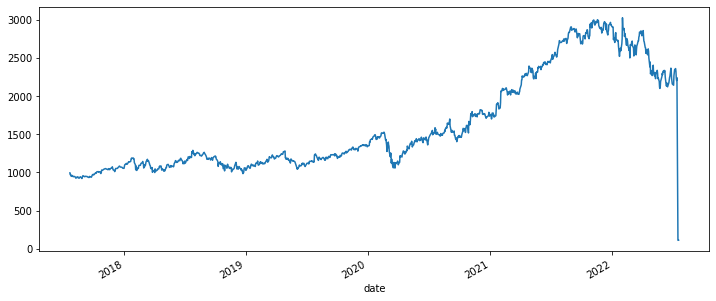

In [64]:
df['open'].plot(figsize = (12, 5))

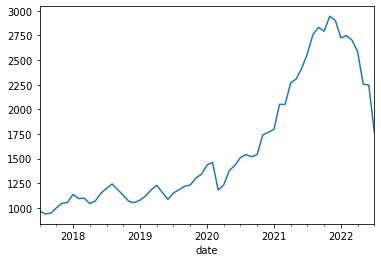

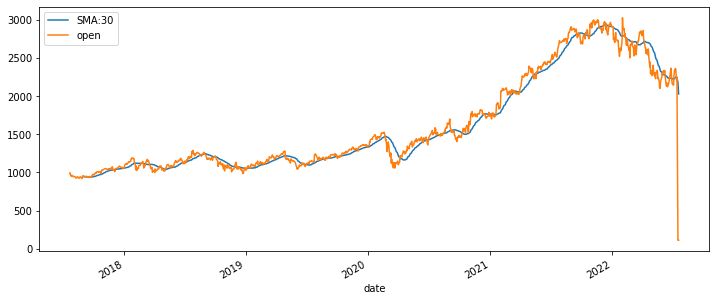

In [69]:
## Now soothening the graph
## Using simple moving average
df['SMA:30'] = df['open'].rolling(30).mean()
df[['SMA:30', 'open']].plot(figsize=(12, 5))

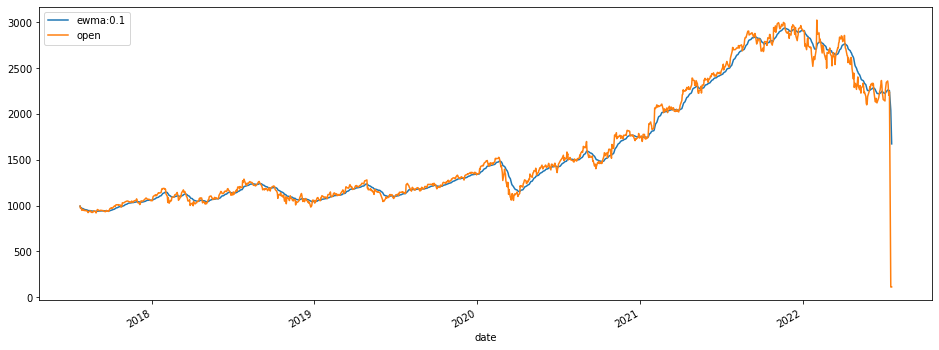

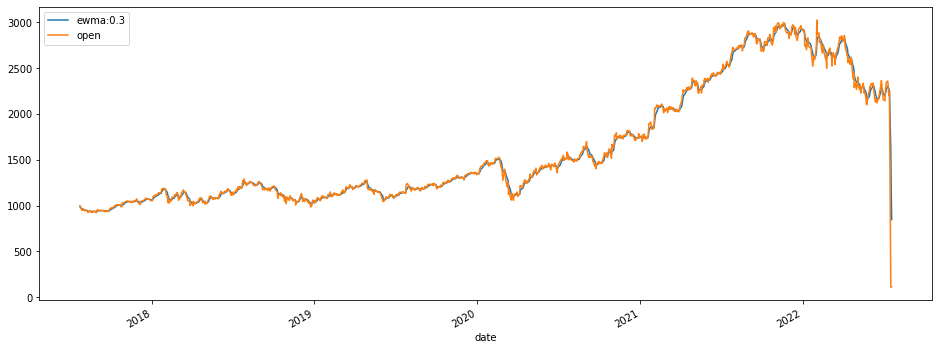

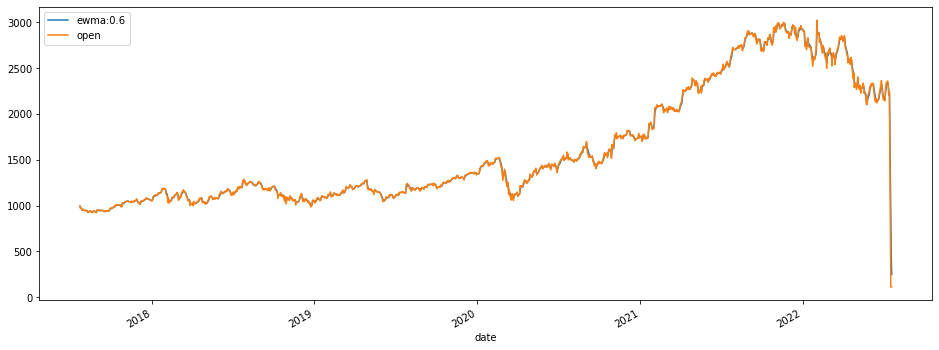

In [74]:
## Now trying the EWMA

df['ewma:0.1'] = df['open'].ewm(alpha = 0.1).mean()
df['ewma:0.3'] = df['open'].ewm(alpha = 0.3).mean()
df['ewma:0.6'] = df['open'].ewm(alpha = 0.6).mean()

df[['ewma:0.1','open']].plot(figsize = (16, 6))
df[['ewma:0.3','open']].plot(figsize = (16, 6))
df[['ewma:0.6','open']].plot(figsize = (16, 6))

In [75]:
## Here ewma 0.3 alpha is giving the best result
## Now we will move on using ewma:0.3
df['new_open'] = df['ewma:0.3']

In [76]:
## Performing the dicky fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data)
    print(f"ADF statistics : {result[0]}")
    print(f"p-value : {result[1]}")

    if result[1] <= 0.05:
        print("Data is stationanry and null hypyothesis is rejected")
    else:
        print("Data is not stationary and null hypothesis is accepted")

In [77]:
adf_test(df['new_open'])

ADF statistics : -1.1915386179316285
p-value : 0.6772249523834512
Data is not stationary and null hypothesis is accepted


In [78]:
## Here data is not stationary so perform the differencing
df['diff_1'] = df['new_open'] - df['new_open'].shift(1)
adf_test(df['diff_1'].dropna())

ADF statistics : -4.608231478466223
p-value : 0.00012473155482556344
Data is stationanry and null hypyothesis is rejected


In [79]:
## Here data is stationary in one defferencing
## Now perform the acf and pacf test

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

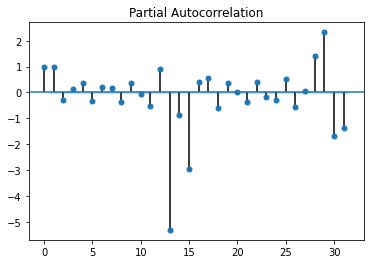

In [88]:
pacf = plot_pacf(df['new_open'].dropna())

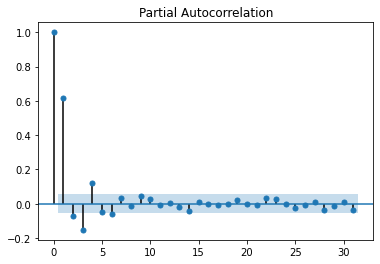

In [86]:
pacf = plot_pacf(df['diff_1'].dropna())

In [ ]:
## p value may be 4

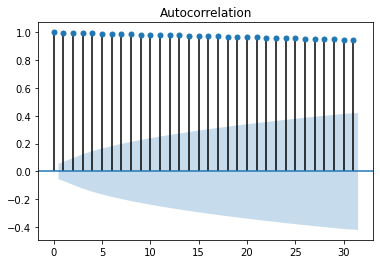

In [87]:
acf = plot_acf(df['new_open'].dropna())

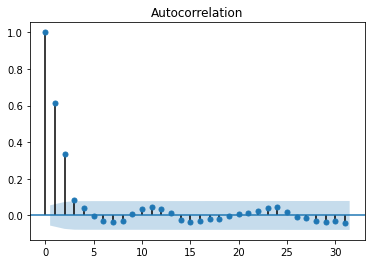

In [85]:
acf = plot_acf(df['diff_1'].dropna())

In [89]:
## q value may be 3

In [90]:
## Fitst split data into train and test split

train_size = int(0.8*(len(df)))
train_data = df['new_open'].iloc[:train_size]
test_data = df['new_open'].iloc[train_size:]

In [121]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [122]:
from datetime import timedelta

In [123]:
pred_start_date , pred_end_date

(Timestamp('2021-07-21 00:00:00'), Timestamp('2022-07-20 00:00:00'))

In [116]:
from statsmodels.tsa.arima_model import ARIMA

In [133]:
model_arima = ARIMA(df['new_open'], order = (4, 0, 3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [134]:
model_arima_fit = model_arima.fit()

In [135]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               new_open   No. Observations:                 1257
Model:                     ARMA(4, 3)   Log Likelihood               -5569.749
Method:                       css-mle   S.D. of innovations             20.263
Date:                Thu, 21 Jul 2022   AIC                          11157.497
Time:                        18:18:46   BIC                          11203.726
Sample:                             0   HQIC                         11174.871
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1615.6256    473.217      3.414      0.001     688.137    2543.114
ar.L1.new_open     2.7922      0.060     46.655      0.000       2.675       2.910
ar.L2.new_open    -3.0374      0.078    -38.698      0.000      -3.191      -2.884
ar.L3.new_open     1.4892      0.041     36.262      0.000       1.409       1.570
ar.L4.new_open    -0.2446      0.033     -7.315      0.000      -0.310      -0.179
ma.L1.new_open    -1.1340      0.064    -17.671      0.000      -1.260      -1.008
ma.L2.new_open     0.5407      0.048     11.267      0.000       0.447       0.635
ma.L3.new_open     0.1420      0.041      3.432      0.001       0.061       0.223
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0030           -0.0000j            1.0030           -0.0000
AR.2            0.9459           -0.6179j            1.1298           -0.0921
AR.3            0.9459           +0.6179j            1.1298            0.0921
AR.4            3.1928           -0.0000j            3.1928           -0.0000
MA.1            0.8433           -0.7553j            1.1321           -0.1162
MA.2            0.8433           +0.7553j            1.1321            0.1162
MA.3           -5.4948           -0.0000j            5.4948           -0.5000
-----------------------------------------------------------------------------
"""

In [136]:
pred = model_arima_fit.predict(start = pred_start_date, end = pred_end_date)

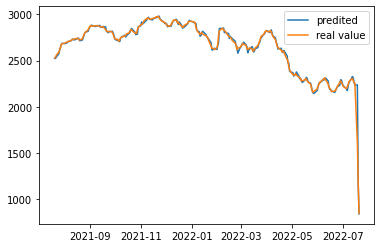

In [137]:
plt.plot(pred)
plt.plot(test_data)
plt.legend(["predited", "real value"])

In [140]:
model_arima_fit.forecast(5, alpha = 0.3) ## For 5 days
## First array is predicted values
## Second array is standard error
## Third matrix is of confidence interval

(array([579.78499443, 384.00715134, 290.57236879, 302.14606432,
        392.09714633]),
 array([20.26278575, 39.23719698, 58.38134236, 77.98404756, 97.27053165]),
 array([[558.78396672, 600.78602215],
        [343.34041028, 424.6738924 ],
        [230.06399625, 351.08074133],
        [221.32079358, 382.97133506],
        [291.28271952, 492.91157315]]))

In [160]:
days = 30
forecast = model_arima_fit.forecast(days, alpha = 0.3)

In [155]:
import numpy as np
test_size = len(test_data)
test_size

252

In [161]:
pred_forecast = np.zeros(test_size + days)

In [166]:
pred_forecast[test_size:] = forecast[0]

In [178]:
pred_forecast.shape

(282,)

In [177]:
test_data_ex = np.zeros(test_size + days)
test_data_ex[:test_size] = test_data
test_data_ex.shape

(282,)

Text(0.5, 1.0, 'Forecasting')

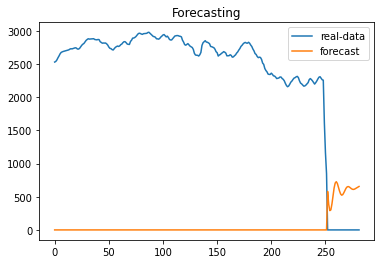

In [180]:
plt.plot(test_data_ex)
plt.plot(pred_forecast)
plt.legend(["real-data","forecast"])
plt.title("Forecasting")